In [69]:
from scipy.stats import norm, f, lognorm, t
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [2]:
nevs_train = 1000000
nevs_val = 200000
nevs_test = 500000

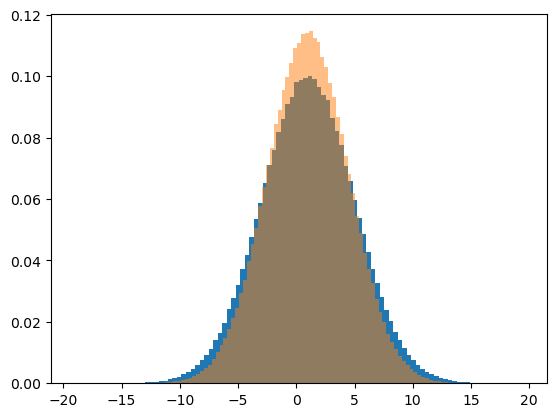

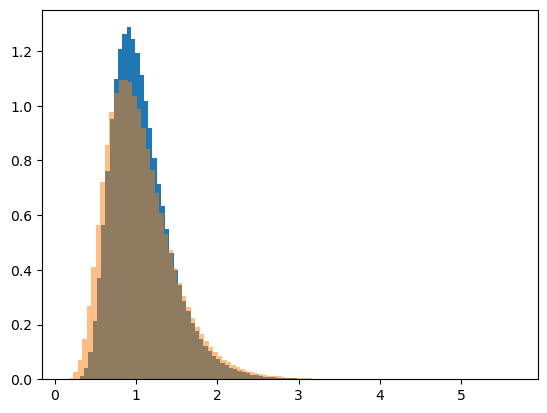

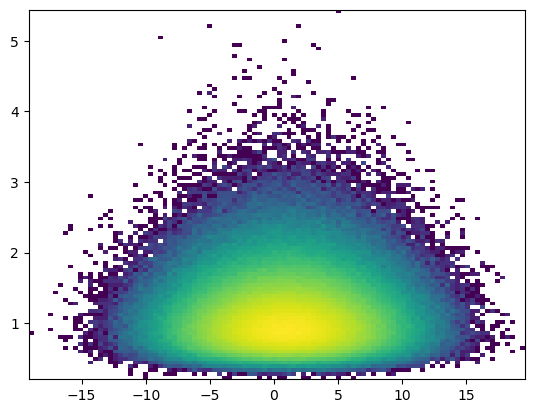

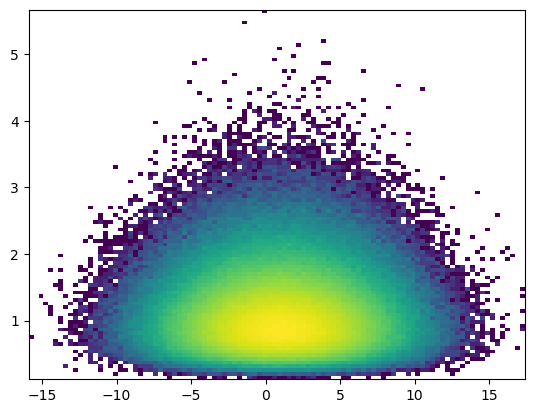

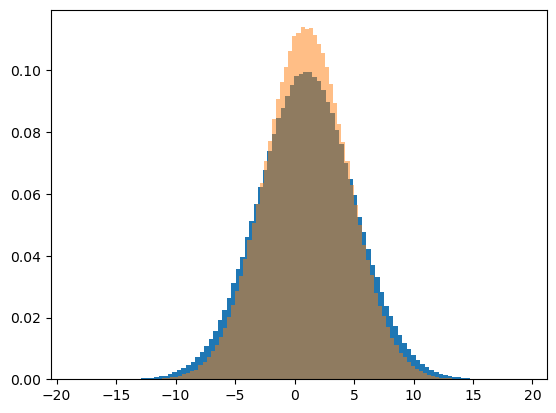

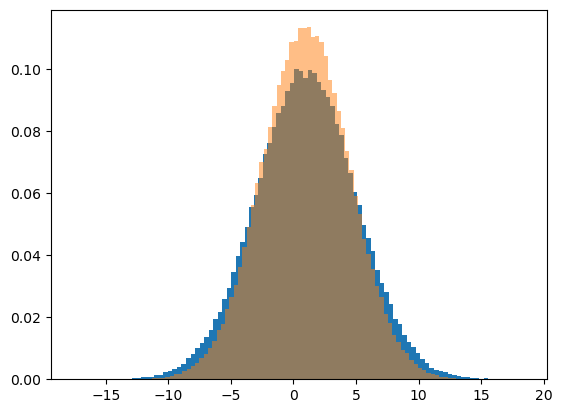

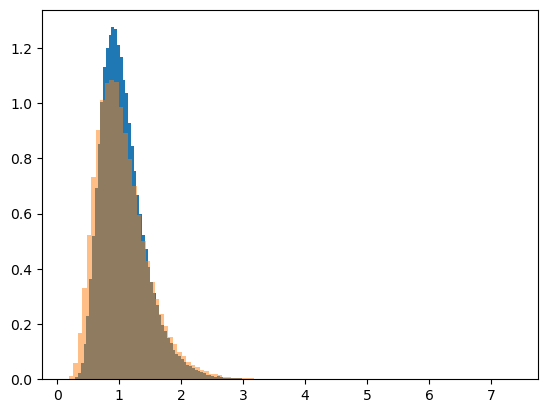

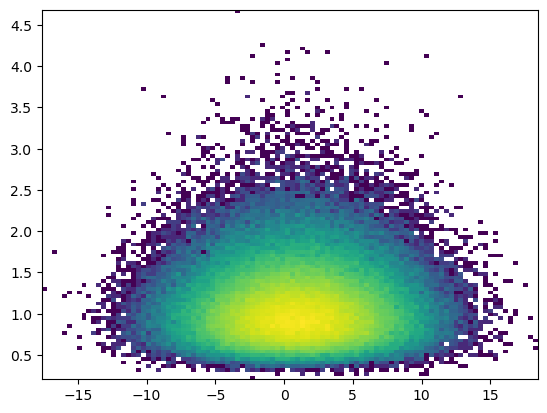

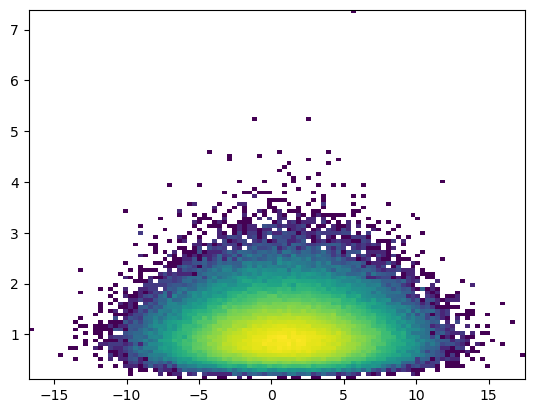

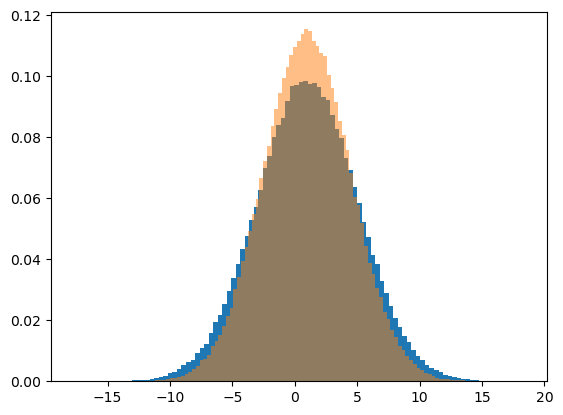

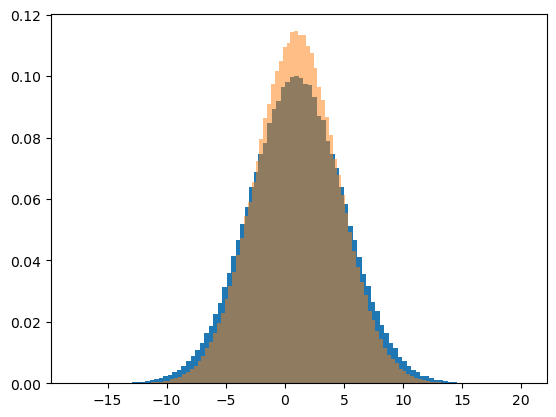

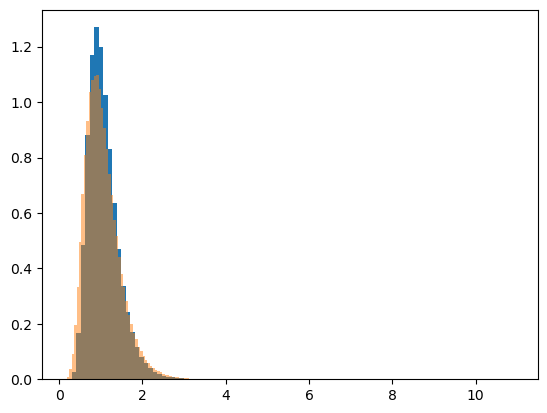

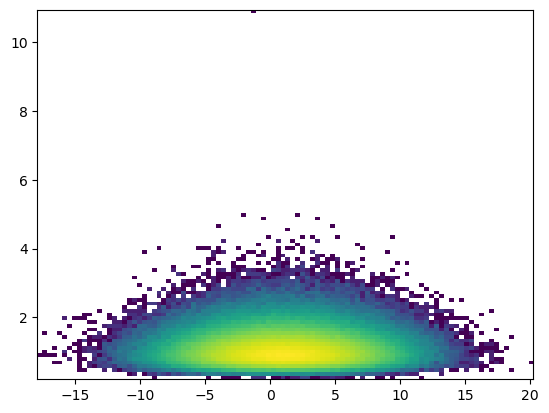

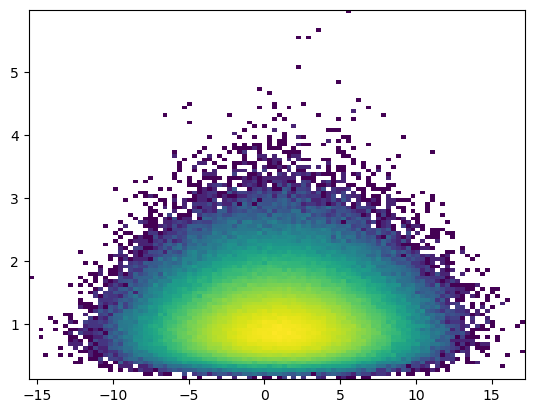

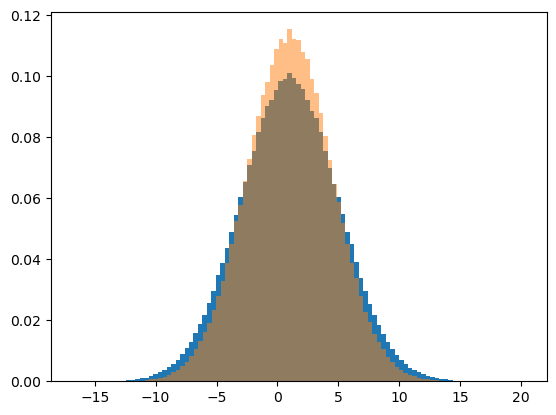

In [86]:
for nevs, label in zip([nevs_train, nevs_val, nevs_test], ["train", "val", "test"]):
    data_r = norm(1, 4).rvs(size=nevs)
    mc_r = norm(1, 3.5).rvs(size=nevs)
    plt.hist(data_r, bins=100, density=True)
    plt.hist(mc_r, bins=100, alpha=0.5, density=True)
    plt.show()
    data_s = f(data_r.mean()*50, 30).rvs(size=nevs)
    mc_s = f(mc_r.mean()*20, 40).rvs(size=nevs)
    plt.hist(data_s, bins=100, density=True)
    plt.hist(mc_s, bins=100, alpha=0.5, density=True)
    plt.show()
    plt.hist2d(data_r, data_s, bins=100, norm=matplotlib.colors.LogNorm())
    plt.show()
    plt.hist2d(mc_r, mc_s, bins=100, norm=matplotlib.colors.LogNorm())
    plt.show()
    data_p = norm(data_r.mean(), data_r.std()).rvs(size=nevs)
    mc_p = norm(mc_r.mean(), mc_r.std()).rvs(size=nevs)
    plt.hist(data_p, bins=100, density=True)
    plt.hist(mc_p, bins=100, alpha=0.5, density=True)
    plt.show()
    
    data_df = pd.DataFrame.from_dict({"probe_pt": np.round(data_p, 2), "probe_r9": np.round(data_r, 2), "probe_s4": np.round(data_s, 2)})
    mc_df = pd.DataFrame.from_dict({"probe_pt": np.round(mc_p, 2), "probe_r9": np.round(mc_r, 2), "probe_s4": np.round(mc_s, 2)})
    data_df.to_parquet(f"data_{label}.parquet")
    mc_df.to_parquet(f"mc_{label}.parquet")

In [81]:
data_df

,probe_pt,probe_r,probe_s
0,-0.771706,3.243137,1.108011
1,-2.949746,-0.173199,0.940293
2,1.306798,5.690550,0.461178
3,-9.039414,-4.052594,0.688942
4,1.310518,1.416066,1.527383
...,...,...,...
499995,-0.279267,1.350200,0.835605
499996,4.271874,3.544016,0.822502
499997,0.342221,0.217103,0.802756
499998,2.166933,1.356448,0.573682
